In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data = pd.read_csv('Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
## Regresión logística

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x = data[['Age','EstimatedSalary']]
y = data[['Purchased']]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 123)

modelo_regresionlogistica = LogisticRegression()
modelo_regresionlogistica.fit(x_train, y_train)

preds = modelo_regresionlogistica.predict(x_test) ## Punto de corte 0.5
preds_proba = modelo_regresionlogistica.predict_proba(x_test)

threshold = 0.4

preds_threshold = np.where(preds_proba[:,1]>threshold, 1,0)

print('Threshold 0.5:',accuracy_score(y_test, preds))
print('Threshold 0.4:',accuracy_score(y_test, preds_threshold))

Threshold 0.5: 0.625
Threshold 0.4: 0.2375


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print(modelo_regresionlogistica.coef_)
print(modelo_regresionlogistica.intercept_)

[[-6.06205439e-09 -3.18060014e-06]]
[-1.6655837e-09]


In [ ]:
### Modelo KNN

##### Manual
promedio = np.mean(x_train['Age'])
std = np.std(x_train['Age'])

np.mean((x_train['Age'] - promedio)/std)
np.std((x_train['Age'] - promedio)/std)

#### Sklearn
from sklearn.preprocessing import StandardScaler

esc = StandardScaler()
x_train_esc = esc.fit_transform(x_train) ### Considera promedio y std de train
x_test_esc = esc.transform(x_test) ### Transforma en base a lo que ya consideró

from sklearn.neighbors import KNeighborsClassifier
modelo_knn = KNeighborsClassifier(n_neighbors=6)
modelo_knn.fit(x_train_esc, y_train)
preds_knn = modelo_knn.predict(x_test_esc)
preds_proba_knn = modelo_knn.predict_proba(x_test_esc)

accuracy_score(preds_knn, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.875

In [ ]:

### Support vector machine

from sklearn.svm import SVC

modelo_svm = SVC(probability=True)

modelo_svm.fit(x_train_esc, y_train)
preds_svm = modelo_svm.predict(x_test_esc)
preds_proba_svm = modelo_svm.predict_proba(x_test_esc)

accuracy_score(preds_svm, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.875

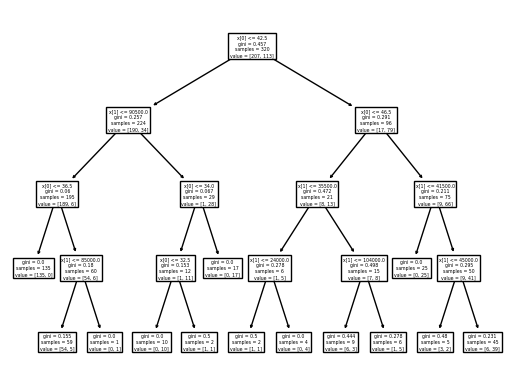

In [ ]:
### Los árboles de decisión

## max_depth

from sklearn.tree import DecisionTreeClassifier, plot_tree

modelo_arbol = DecisionTreeClassifier(max_depth = 4)
modelo_arbol.fit(x_train, y_train)
preds_arbol = modelo_arbol.predict(x_test)
plot_tree(modelo_arbol)
plt.show()

In [ ]:
accuracy_score(preds_arbol, y_test)

0.85